# <font color='red' size='6'>Inteligência Artificial</font>

## Atividade

### Agentes de Resolução de Problemas – Algoritmos de Busca - Busca Com Informação - Simulação

#### Algoritmo A*

Grupo (Máx. 4 alunos) - Integrantes
<table width="300" border="2">
    <tr>
        <td><b>Nome do Aluno</b> </td>
        <td><b>RA</b></td>
     </tr>  
   <tr>
       <td>Aline Yumi Higa</td>
       <td>10402138</td>
   </tr>
   <tr>
       <td>Gustavo Garabetti</td>
       <td>10409258</td>
   </tr>
   <tr>
       <td>Karine Yoo Lim Choi</td>
       <td>10403237</td>
   </tr>
   <tr>
       <td>Paula Aguiar Oliveira</td>
       <td>10403270</td>
   </tr>
</table>


In [1]:
from search import *

## Definindo o Problema

Esta atividade consiste em construir agentes baseados em objetivos que podem planejar a resolução de problemas com antecedência, em particular problemas de navegação / problema de localização de rotas. 

Com base no mapa do Brasil a seguir, suas cidades, as rotas com as distâncias entre algumas delas, montar um grafo contendo pelo menos as cidades indicadas e as suas ligações e inclua mais 3 cidades contendo cada uma delas ao menos duas ligações com outras existentes.

Como sugestão, escolha todas as 3 cidades a incluir, depois, encontre as distâncias entre aquelas que você vai interligar, então, crie o grafo. Tente montar o grafo de forma aproximada conforme as cidades realmente aparecem no mapa.

Despois disso, criar o problema como um grafo, fazer testes considerando uma cidade como nó inicial e outro como destino. Execute o A*.

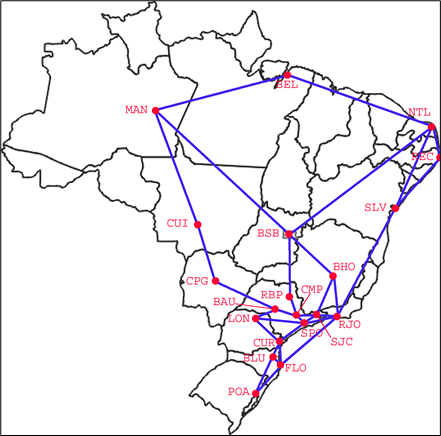

In [3]:
from IPython.display import Image
Image("brasil.png")

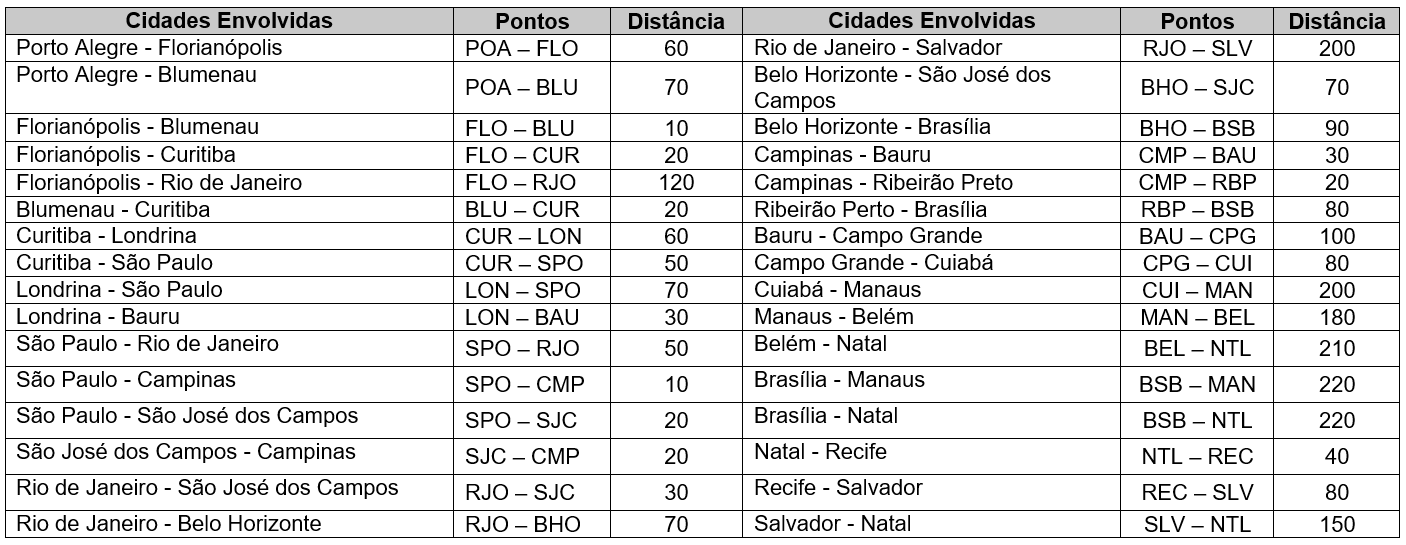

In [5]:
from IPython.display import Image
Image("rotas.png")

<table>
    <tr>
        <td><b>Cidades</b> </td>
        <td><b>Cidade Interligada 1</b> </td>
        <td><b>Distância Cidade 1</b> </td>
        <td><b>Cidade Interligada 2</b> </td>
        <td><b>Distância Cidade 2</b> </td>
   </tr>
   <tr>
        <td>Barueri - SP</td>
        <td>São José dos Campos - SP</td>
        <td>25</td>
        <td>Rio de Janeiro - RJ</td>
        <td>45</td>
    </tr>
   <tr>
        <td>Carauari - AM</td>
        <td>Manaus - AM</td>
        <td>230</td>
        <td>Belém - PA</td>
        <td>292</td>
   </tr>
   <tr>
        <td>Quixadá - CE</td>
        <td>Natal - RN</td>
        <td>67</td>
        <td>Salvador - BA</td>
        <td>106</td>
    </tr>        
</table>

#### Usaremos a classe abstrata `Problem` para definir o problema real ** chamado` GraphProblem`. 

Agora é hora de definir o nosso problema. Nosso problema é encontrar o estado objetivo a partir do estado inicial no grafo fornecido. Monte o brasil_map, que é um Grafo nã direcionado contendo um dict de nodes como chaves e cidades vizinhas como valores.

In [7]:
# Montar o grafo não direcionado com os nós e suas ligações (arestas)
brasil_map = UndirectedGraph(dict(
    PortoAlegre=dict(Florianopolis=60, Blumenau=70),
    Florianopolis=dict(Blumenau=10, Curitiba=20, RioDeJaneiro=120),
    Blumenau=dict(Curitiba=20),
    Curitiba=dict(Londrina=60, SaoPaulo=70),
    Londrina=dict(SaoPaulo=70, Bauru=30),
    SaoPaulo=dict(RioDeJaneiro=50, Campinas=10, SaoJoseDosCampos=20),
    SaoJoseDosCampos=dict(Campinas=20),
    RioDeJaneiro=dict(SaoJoseDosCampos=30, BeloHorizonte=70, Salvador=200),
    BeloHorizonte=dict(SaoJoseDosCampos=70, Brasilia=90),
    Campinas=dict(Bauru=30, RibeiraoPreto=20),
    RibeiraoPreto=dict(Brasilia=80),
    Bauru=dict(CampoGrande=100),
    CampoGrande=dict(Cuiaba=80),
    Cuiaba=dict(Manaus=200),
    Manaus=dict(Belem=180),
    Belem=dict(Natal=210),
    Brasilia=dict(Manaus=220, Natal=220),
    Natal=dict(Recife=40),
    Recife=dict(Salvador=80),
    Salvador=dict(Natal=150),
    Barueri=dict(SaoJoseDosCampos=25, RioDeJaneiro=45),
    Carauari=dict(Manaus=230, Belem=292),
    Quixada=dict(Natal=67, Salvador=106)
))

# Montar as posições de cada cidade do o mapa do Brasil (tente colocar a posição aproximada)
brasil_map.locations = dict(
    PortoAlegre=(360, 263), Florianopolis=(383, 305), Blumenau=(385, 314), Curitiba=(388,323), Londrina=(391, 357), SaoPaulo=(429, 362), 
    Campinas=(423, 365), Bauru=(408, 367), SaoJoseDosCampos=(432, 366), RibeiraoPreto=(417, 376), BeloHorizonte=(452, 409), 
    RioDeJaneiro=(460, 375), Brasilia=(440, 444), Salvador=(506, 492), Natal=(537, 548), Recife=(537, 526), CampoGrande=(355, 395), 
    Cuiaba=(327, 463), Manaus=(284, 576), Belem=(434, 609), Carauari=(238, 544), Barueri=(425, 362), Quixada=(498, 562)
)

siglas = dict(    
    PortoAlegre='POA',
    Florianopolis='FLO',
    Blumenau='BLU',
    Curitiba='CUR',
    Londrina='LON',
    SaoPaulo='SPO',
    SaoJoseDosCampos='SJC',
    RioDeJaneiro='RJO',
    BeloHorizonte='BHO',
    Campinas='CMP',
    RibeiraoPreto='RBP',
    Bauru='BAU',
    CampoGrande='CPG',
    Cuiaba='CUI',
    Manaus='MAN',
    Belem='BEL',
    Brasilia='BSB',
    Natal='NTL',
    Recife='REC',
    Salvador='SLV',
    Barueri='BAR',
    Carauari='CAU',
    Quixada='QUI'
)

É bastante simples entender este `brasil_map`. O primeiro nó ** PortoAlegre ** tem dois vizinhos denominados ** Florianopolis **, ** Blumenau **. Cada um destes nós é 60 e 70 unidades de ** Porto Alegre **, respectivamente. E o mesmo acontece com outros nós.

E `brasil_map.locations` contém as posições de cada um dos nós. Usaremos a distância em linha reta (que é diferente da fornecida em `brasil_map`) entre duas cidades em algoritmos como A \ * - search e Recursive Best First Search.

** Definir um problema: **
Hmm ... digamos que queremos começar a explorar a partir de ** ESCOLHA A CIDADE INICIAL  ** e tentar encontrar ** CIDADE DESTINO ESCOLHIDA ** em nosso bradil_map. Então, é assim que fazemos.

Faça variados testes encolvendo a CIDADE INICIAL E A DESTINO.

In [9]:
brasil_problem = GraphProblem('Carauari', 'SaoJoseDosCampos', brasil_map)

# Visualizando o Mapa do Brasil

Vamos ver uma visualização do mapa do Brasil e ver como diferentes algoritmos de busca executam.

In [11]:
brasil_locations = brasil_map.locations
print(brasil_locations)

{'PortoAlegre': (360, 263), 'Florianopolis': (383, 305), 'Blumenau': (385, 314), 'Curitiba': (388, 323), 'Londrina': (391, 357), 'SaoPaulo': (429, 362), 'Campinas': (423, 365), 'Bauru': (408, 367), 'SaoJoseDosCampos': (432, 366), 'RibeiraoPreto': (417, 376), 'BeloHorizonte': (452, 409), 'RioDeJaneiro': (460, 375), 'Brasilia': (440, 444), 'Salvador': (506, 492), 'Natal': (537, 548), 'Recife': (537, 526), 'CampoGrande': (355, 395), 'Cuiaba': (327, 463), 'Manaus': (284, 576), 'Belem': (434, 609), 'Carauari': (238, 544), 'Barueri': (425, 362), 'Quixada': (498, 562)}


In [13]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import lines
import warnings
warnings.filterwarnings('ignore')
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display
import time

Vamos começar as visualizações importando os módulos necessários. Usamos networkx e matplotlib para mostrar o mapa no notebook e usamos ipywidgets para interagir com o mapa para ver como funciona o algoritmo de busca.

Vamos começar inicializando um grafo vazio. Vamos adicionar nós, coloque os nós em seu local como mostrado no livro, adicione bordas para o grafo.

In [15]:
# Inicializa o Grafo
G = nx.Graph()

# Use isso ao rotular nós no mapa
node_labels = dict()

# Use isso para modificar as cores dos nós enquanto explora o grafo.
# Este é o único dic que enviamos para `show_map (node_colors)` ao desenhar o mapa
node_colors = dict()

for n, p in brasil_locations.items():
    G.add_node(n)
    node_labels[n] = siglas[n]
    node_colors[n] = "blue"

# Vamos salvar as cores do nó inicial para um dict para usar mais tarde
initial_node_colors = dict(node_colors)
    
# Posições para rótulos de nó
node_label_pos = {k:[v[0],v[1]-10] for k,v in brasil_locations.items()}

# Use o tempo marcando bordas
edge_labels = dict()

# Adicionar bordas entre cidades no mapa do Brasil - UndirectedGraph definido em search.py
for node in brasil_map.nodes():
    connections = brasil_map.get(node)
    for connection in connections.keys():
        distance = connections[connection]
        G.add_edge(node, connection)
        edge_labels[(node, connection)] = distance

Concluímos a construção do nosso grafo com base em romania_map e suas localizações. É hora de exibi-lo aqui no notebook. Esta função `show_map (node_colors)` nos ajuda a fazer isso. Estaremos chamando esta função mais tarde para exibir o mapa em cada intervalo de intervalo durante a pesquisa usando variedade de algoritmos do livro.

In [17]:
def show_map(node_colors):
    
    # Tamanho do grafo
    plt.figure(figsize=(18,13))

    # Desenhando o grafo
    nx.draw(G, pos = brasil_locations, node_color = [node_colors[node] for node in G.nodes()])

    node_label_handles = nx.draw_networkx_labels(G, pos = node_label_pos, labels = node_labels, font_size = 9)
    
    [label.set_bbox(dict(facecolor='white', edgecolor='none')) for label in node_label_handles.values()]

    nx.draw_networkx_edge_labels(G, pos = brasil_locations, edge_labels=edge_labels, font_size = 20)
    
    # Legenda
    white_circle = lines.Line2D([], [], color="white", marker='o', markersize=15, markerfacecolor="blue")
    orange_circle = lines.Line2D([], [], color="white", marker='o', markersize=15, markerfacecolor="orange")
    red_circle = lines.Line2D([], [], color="white", marker='o', markersize=15, markerfacecolor="red")
    gray_circle = lines.Line2D([], [], color="white", marker='o', markersize=15, markerfacecolor="gray")
    plt.legend((white_circle, orange_circle, red_circle, gray_circle),
               ('Não Explorado', 'Fronteira', 'Explorando neste momento', 'Explorado'),
               numpoints=1,prop={'size':16}, loc=(.8,.75))
    
    plt.show()

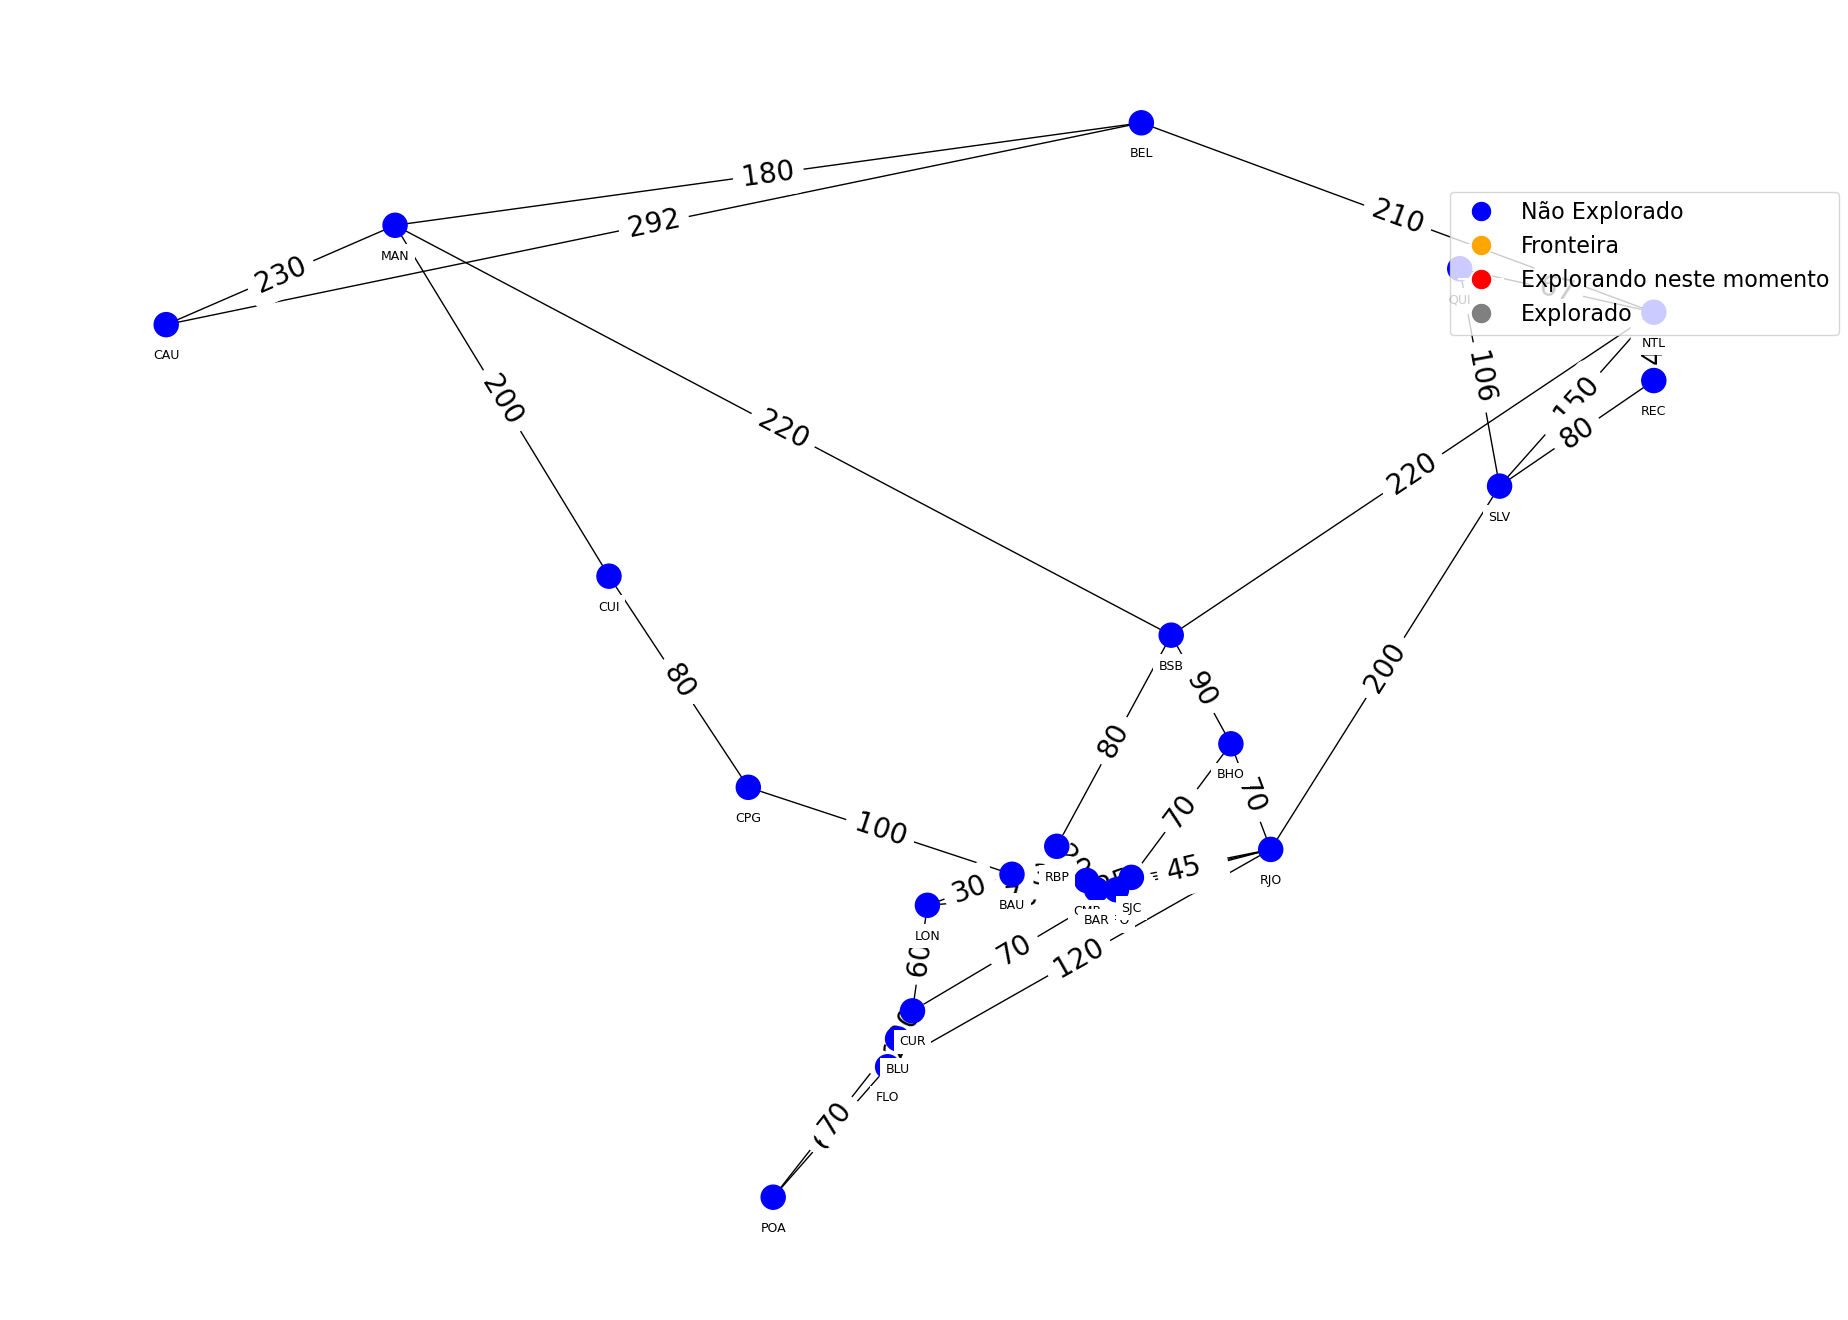

In [19]:
show_map(node_colors)

In [21]:
# módulo python para fazer o algoritmo executar mais lentamente com sleep
import time
tempoSegundos = 5

## Visualizando a Busca A*

Foram adicionadas cores aos nós para ter uma visualização mais compreensível. Então, essas são as diferentes cores que estamos usando nesses visuais:

* Nós Não Explorados - <font color='black'>azul</font>
* Nós Fronteira - <font color='orange'>laranja</font>
* Nós Sendo Explorados Neste Momento - <font color='red'>vermelho</font>
* Nós já Explorados - <font color='gray'>cinza</font>

In [23]:
# Esse código define o que a cor representa
# define como cada nó será colorido dentro do nosso mapa
def final_path_colors(problem, solution):
    "Retorna um node_colors dict do caminho final do problema até a solução"
    
    final_colors = dict(initial_node_colors)
    final_colors[problem.initial] = "green"
    for node in solution:
        final_colors[node] = "green"  
    return final_colors


def display_visual(user_input, algorithm=None, problem=None):
    if user_input == False:
        def slider_callback(iteration):
            try:
                show_map(all_node_colors[iteration])
            except:
                pass
        def visualize_callback(Visualize):
            if Visualize is True:
                button.value = False
                
                global all_node_colors
                
                iterations, all_node_colors, node = algorithm(problem)
                solution = node.solution()
                all_node_colors.append(final_path_colors(problem, solution))
                
                slider.max = len(all_node_colors) - 1
                
                for i in range(slider.max + 1):
                    time.sleep(tempoSegundos)
                    slider.value = i
        
        slider = widgets.IntSlider(min=0, max=1, step=1, value=0)
        slider_visual = widgets.interactive(slider_callback, iteration = slider)
        display(slider_visual)

        button = widgets.ToggleButton(value = False)
        button_visual = widgets.interactive(visualize_callback, Visualize = button)
        display(button_visual)
    
    if user_input == True:
        node_colors = dict(initial_node_colors)
        if algorithm == None:
            algorithms = {"Breadth First Tree Search": breadth_first_tree_search, "Breadth First Search": breadth_first_search, "Uniform Cost Search": uniform_cost_search, "A-star Search": astar_search}
            algo_dropdown = widgets.Dropdown(description = "Search algorithm: ", options = sorted(list(algorithms.keys())), value = "Breadth First Tree Search")
            display(algo_dropdown)
        
        def slider_callback(iteration):
            try:
                show_map(all_node_colors[iteration])
            except:
                pass
            
        def visualize_callback(Visualize):
            if Visualize is True:
                button.value = False
                
                problem = GraphProblem(start_dropdown.value, end_dropdown.value, brasil_map)
                global all_node_colors
                
                if algorithm == None:
                    user_algorithm = algorithms[algo_dropdown.value]
            
                
                iterations, all_node_colors, node = user_algorithm(problem)
                solution = node.solution()
                all_node_colors.append(final_path_colors(problem, solution))

                slider.max = len(all_node_colors) - 1
                
                for i in range(slider.max + 1):
                    slider.value = i
                         
        start_dropdown = widgets.Dropdown(description = "Start city: ", options = sorted(list(node_colors.keys())), value = "SaoPaulo")
        display(start_dropdown)

        end_dropdown = widgets.Dropdown(description = "Goal city: ", options = sorted(list(node_colors.keys())), value = "RioDeJaneiro")
        display(end_dropdown)
        
        button = widgets.ToggleButton(value = False)
        button_visual = widgets.interactive(visualize_callback, Visualize = button)
        display(button_visual)
        
        slider = widgets.IntSlider(min=0, max=1, step=1, value=0)
        slider_visual = widgets.interactive(slider_callback, iteration = slider)
        display(slider_visual)
        

## A* Search

Vamos mudar todos os node_colors para a posição inicial e definir uma declaração de problema diferente.

In [25]:
def best_first_graph_search(problem, f):

    iterations = 0
    all_node_colors = []
    node_colors = dict(initial_node_colors)
    
    f = memoize(f, 'f')
    node = Node(problem.initial)
    
    node_colors[node.state] = "red"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    if problem.goal_test(node.state):
        node_colors[node.state] = "green"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        return(iterations, all_node_colors, node)
    
    frontier = PriorityQueue(min, f)
    frontier.append(node)
    
    node_colors[node.state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    explored = set()
    while frontier:
        node = frontier.pop()
        
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        if problem.goal_test(node.state):
            node_colors[node.state] = "green"
            iterations += 1
            all_node_colors.append(dict(node_colors))
            return(iterations, all_node_colors, node)
        
        explored.add(node.state)
        for child in node.expand(problem):
            if child.state not in explored and child not in frontier:
                frontier.append(child)
                node_colors[child.state] = "orange"
                iterations += 1
                all_node_colors.append(dict(node_colors))
            elif child in frontier:
                incumbent = frontier[child]
                if f(child) < f(incumbent):
                    del frontier[incumbent]
                    frontier.append(child)
                    node_colors[child.state] = "orange"
                    iterations += 1
                    all_node_colors.append(dict(node_colors))

        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
    return None

def astar_search(problem, h=None):
    """A busca A* é a melhor pesquisa de grafo com f (n) = g (n) + h (n).
     Você precisa especificar a função h quando você chama a função astar_search, ou
     em sua subclasse de Problemas."""
    h = memoize(h or problem.h, 'h')
    iterations, all_node_colors, node = best_first_graph_search(problem, lambda n: n.path_cost + h(n))
    return(iterations, all_node_colors, node)

### Apresenta o controle de visualização do mapa  do Brasil e da simulação da busca

In [27]:
all_node_colors = []
brasil_problem = GraphProblem('Carauari', 'SaoJoseDosCampos', brasil_map)
display_visual(user_input = False, algorithm = astar_search, problem = brasil_problem)

interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='Visualize'), Output()), _dom_classes=('widget-int…

In [29]:
all_node_colors = []
brasil_problem = GraphProblem('Salvador', 'Florianopolis', brasil_map)
display_visual(user_input = False, algorithm = astar_search, problem = brasil_problem)

interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='Visualize'), Output()), _dom_classes=('widget-int…

In [31]:
all_node_colors = []
brasil_problem = GraphProblem('PortoAlegre', 'Quixada', brasil_map)
display_visual(user_input = False, algorithm = astar_search, problem = brasil_problem)

interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='Visualize'), Output()), _dom_classes=('widget-int…

### <font size = '2'>prof. Dr. Ivan Carlos Alcântara de Oliveira</font> - <font color="blue">https://orcid.org/0000-0002-6020-7535</font>